### 오케라스트라 (캐글뽀개기X케라스코리아) 파트1 주말반
#### 캐글뽀개기, 이상열
#### (keras) 1. 케라스 시작하기

#### 커뮤니티 
- 캐글뽀개기 : https://www.facebook.com/groups/kagglebreak/
- 케라스 코리아 : https://www.facebook.com/groups/KerasKorea/

![img](./img/image.jpg)

- Reference : 저자 블로그 https://tykimos.github.io/lecture/

### 1. 케라스 시작하기

#### 1.1 케라스의 주요 특징
1. 모듈화 (모듈 독립적, 가능한 최소한의 제약사항, 시퀀스 또는 그래프로 모듈들 구성)
2. 최소주의 (각 모듈은 짧고 간결성)
3. 쉬운 확장성 (새로운 클래스나 함수로 모듈을 쉽게 추가할 수 있음)
4. 파이썬 기반

#### 1.2 케라스 기본 개념
- 가장 핵심적인 데이터 구조 = 모델, 시퀀스 모델로 원하는 레이어 순차적으로 쌓을 수 있음

1. 데이터셋 생성하기 
    - 원본 데이터 불러오거나 시뮬레이션 통해 데이터 생성
    - 데이터로부터 훈련셋, 검증셋, 시험셋 생성
2. 모델 구성하기
    - 시퀀스 모델 생성 뒤 필요한 레이어 추가 구성
    - 복잡한 모델이 필요할 때는 케라스 함수 API 사용
3. 모델 학습과정 설정하기
    - 학습하기 전에 학습에 대한 설정을 수행
    - 손실 함수 및 최적화 방법 정의
    - 케라스에서는 complie() 함수를 사용
4. 모델 학습시키기
    - 훈련셋을 이용하여 구성한 모델 학습
5. 학습과정 살펴보기
    - 모델 학습 시 훈련셋, 검증셋의 손실 및 정확도 측정
6. 모델 평가하기
    - 준비된 시험셋으로 학습한 모델 평가
7. 모델 사용하기
    - 임의의 입력으로 모델의 출력을 얻음
    
#### 1.3 손글씨 영상 분류 모델 구현 
- 28 X 28 이미지 입력 받아 784 벡터로 구성한 휘 학습 및 평가하는 코드

In [1]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import plot_model

Using TensorFlow backend.


In [2]:
# 1. 데이터셋 생성하기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [3]:
import numpy as np

In [4]:
np.shape(x_train)

(60000, 784)

In [5]:
np.shape(x_test)

(10000, 784)

In [6]:
np.shape(y_train)

(60000, 10)

In [7]:
np.shape(x_test)

(10000, 784)

In [8]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [9]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
%matplotlib inline

# pydot 윈도우 에러 : https://tykimos.github.io/2017/08/07/Keras_Install_on_Windows/

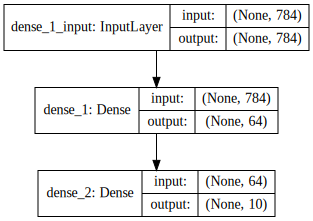

In [10]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [37]:
# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [38]:
# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.6869 - acc: 0.8252
Epoch 2/5
60000/60000 [==============================] - 2s 32us/step - loss: 0.3378 - acc: 0.9061
Epoch 3/5
60000/60000 [==============================] - 2s 32us/step - loss: 0.2882 - acc: 0.9200
Epoch 4/5
60000/60000 [==============================] - 2s 32us/step - loss: 0.2593 - acc: 0.9278
Epoch 5/5
60000/60000 [==============================] - 2s 32us/step - loss: 0.2385 - acc: 0.9335


In [39]:
# 5. 학습과정 살펴보기
print('## training loss and acc ##')
print(hist.history['loss'])
print(hist.history['acc'])

## training loss and acc ##
[0.68689216461579006, 0.33777152049938836, 0.2881907583574454, 0.25933876719474791, 0.23854898762802282]
[0.82516666666666671, 0.90610000000000002, 0.91996666666666671, 0.92783333333333329, 0.9335]


In [40]:
# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

10000/10000 [==============================] - 0s 20us/step
## evaluation loss and_metrics ##
[0.22738593712747096, 0.93730000000000002]


In [11]:
# 7. 모델 사용하기
xhat = x_test[0:1]
yhat = model.predict(xhat)
print('## yhat ##')
print(yhat)

## yhat ##
[[ 0.09428676  0.08607131  0.06028552  0.10256538  0.14904547  0.08466402
   0.12507488  0.10403883  0.09331768  0.10065018]]


[keras model api 설명](https://keras.io/models/model)
<br>
[keras gitbook](https://ustczen.gitbooks.io/keras/content/)

### Keras Gitbook Examples
- https://faroit.github.io/keras-docs/0.3.0/examples/

In [12]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD

In [14]:
model = Sequential()

In [17]:
model.add(Dense(20, input_dim=64, init='uniform'))
model.add(Activation('tanh'))

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(20, kernel_initializer="uniform", input_dim=64)`
  if __name__ == '__main__':


In [19]:
model.add(Dropout(0.5))
model.add(Dense(64, input_dim=64, init='uniform'))
model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(Dense(64, input_dim=2, init='uniform'))
model.add(Activation('softmax'))

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, kernel_initializer="uniform", input_dim=64)`
  from ipykernel import kernelapp as app
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, kernel_initializer="uniform", input_dim=2)`


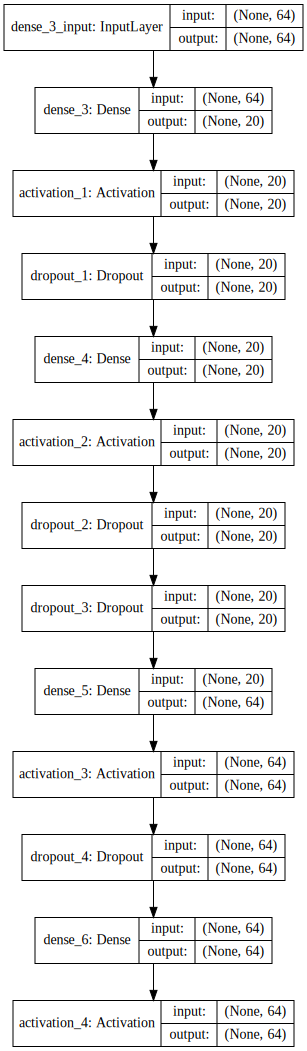

In [20]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [21]:
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)

In [30]:
model = Sequential()
model.add(Dense(20, input_dim=64, init='uniform', activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(64, input_dim=64, init='uniform', activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(64, input_dim=2, init='uniform', activation='softmax'))

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(20, kernel_initializer="uniform", input_dim=64, activation="tanh")`
  from ipykernel import kernelapp as app
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, kernel_initializer="uniform", input_dim=64, activation="tanh")`
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, kernel_initializer="uniform", input_dim=2, activation="softmax")`


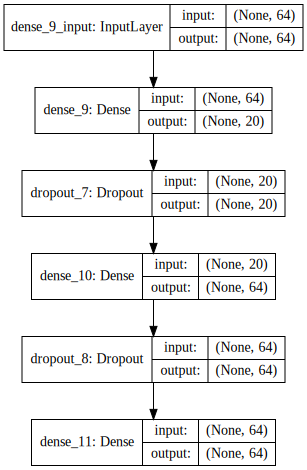

In [31]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))